In [1]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env


from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [2]:
model_file = r"./models/TD3_latest"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action
policy_noise =0.2
noise_clip = 0.5
policy_freq =2

kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}


policy_name="TD3"

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [3]:
state, done = env.reset(validation=True), False
#for parameter in policy.actor_target.parameters():
#    print(parameter)
while not done:
    action = policy.select_action(10000*np.array(state))
    print(np.array(state))
    print(action)
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
#print(env.profilios)
profilios = env.profilios
#print (profilios[0])

Parameter containing:
tensor([[-0.3616,  0.2353,  0.1510,  ..., -0.0435,  0.2735, -0.1817],
        [-0.3520,  0.0562, -0.0861,  ...,  0.2401, -0.0290, -0.2001],
        [ 0.2298, -0.0547,  0.0703,  ..., -0.1214,  0.2953, -0.0572],
        ...,
        [ 0.0335,  0.3597,  0.3025,  ..., -0.0432, -0.5310,  0.0991],
        [ 0.1638,  0.3125, -0.3758,  ...,  0.0831,  0.0919,  0.1137],
        [-0.2131,  0.4632,  0.1542,  ..., -0.2647, -0.3580,  0.4426]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1091,  0.3075, -0.0374, -0.1667,  0.2150,  0.1218,  0.0898, -0.1341,
        -0.0687, -0.2925,  0.0281,  0.0808, -0.1868, -0.1501,  0.3285, -0.3652,
        -0.2552,  0.3147, -0.0547,  0.1032,  0.2035, -0.3686,  0.5330,  0.2050,
         0.2191, -0.2715,  0.3626, -0.2358,  0.2354, -0.0172, -0.1156, -0.0315,
        -0.1310,  0.1384,  0.3365, -0.2402,  0.0901, -0.0352, -0.3923, -0.4169,
        -0.0861,  0.0090, -0.2729, -0.4045, -0.2485, -0.3059, -0.2784,  0.0201

In [4]:
print (len(profilios[0]))

6


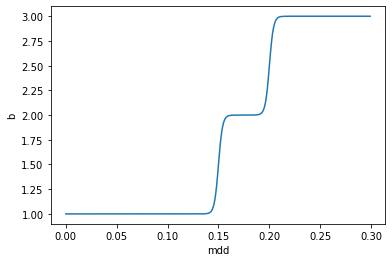

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('mdd')
ax.set_ylabel('b')
ax.plot(x,y)


plt.show()

In [6]:
x=5
1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

3.0